In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import sklearn
import graphviz
from matplotlib import pyplot as plt

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


## Trying a decision tree with the cleaned data, using FIRE_SIZE_CLASS as the label.

In [3]:
data = pd.read_pickle('final_dataset_1.pkl')


In [4]:
data.head()


,DISCOVERY_DATETIME,STATE,TIME_TO_CONT,FIRE_YEAR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,FIRE_SIZE_CLASS
0,2,4.0,4.50,2005,9.0,40.036944,-121.005833,1
1,5,4.0,6.75,2004,1.0,38.933056,-120.404444,1
2,5,4.0,1.05,2004,5.0,38.984167,-120.735556,1
3,6,4.0,118.00,2004,1.0,38.559167,-119.913333,1
4,6,4.0,116.00,2004,1.0,38.559167,-119.933056,1


In [5]:
y = data['FIRE_SIZE_CLASS']
X = data.drop(columns=['FIRE_SIZE_CLASS'])

In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: FIRE_SIZE_CLASS, dtype: int64

In [7]:
X.head()

,DISCOVERY_DATETIME,STATE,TIME_TO_CONT,FIRE_YEAR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE
0,2,4.0,4.50,2005,9.0,40.036944,-121.005833
1,5,4.0,6.75,2004,1.0,38.933056,-120.404444
2,5,4.0,1.05,2004,5.0,38.984167,-120.735556
3,6,4.0,118.00,2004,1.0,38.559167,-119.913333
4,6,4.0,116.00,2004,1.0,38.559167,-119.933056


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [9]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print(accuracy_score(y_train, y_train_predict))
print(accuracy_score(y_test, y_test_predict))

0.998142707029603
0.5902474156059015


In [10]:
md = [1, 2, 4,8, 16, 32, 64]
rand_state = [1, 2, 3, 4, 5]

In [11]:
clf = DecisionTreeClassifier(random_state=0)

In [12]:
import numpy as np

train_accuracy = []
test_accuracy = []

for i in md:
    ta = []
    tsa = []
    for j in rand_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=j)
        clf = DecisionTreeClassifier(random_state=0, max_depth=i)
        clf = clf.fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        ta.append((accuracy_score(y_train, y_train_predict)))
        tsa.append((accuracy_score(y_test, y_test_predict)))
    train_accuracy.append(ta)
    test_accuracy.append(tsa)

In [13]:
train_mean = np.mean(train_accuracy,1)
train_std = np.std(train_accuracy, 1)

In [14]:
test_mean = np.mean(test_accuracy, 1)
test_std = np.std(test_accuracy, 1)

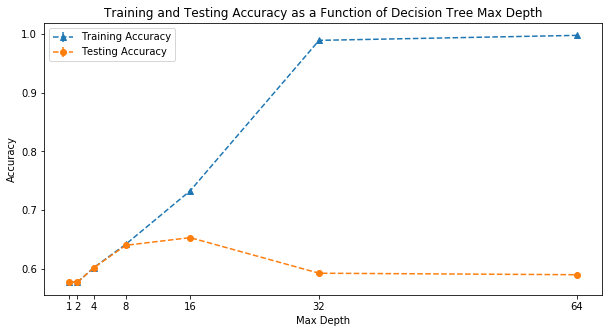

In [15]:
plt.figure(figsize=(10,5))

plt.errorbar(md, train_mean, yerr=train_std, linestyle='dashed', marker='^', label='Training Accuracy')
plt.errorbar(md, test_mean, yerr=test_std, linestyle='dashed', marker='o', label='Testing Accuracy')
plt.title('Training and Testing Accuracy as a Function of Decision Tree Max Depth')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.xticks(md, md)
plt.legend()

## Try again, with data that has outliers removed

In [16]:
data = pd.read_pickle('final_data_without_outliers.pkl')

In [17]:
y = data['FIRE_SIZE_CLASS']
X = data.drop(columns=['FIRE_SIZE_CLASS', 'DISCOVERY_TIME', 'DISCOVERY_DATETIME'])

In [18]:
X.head()

,STAT_CAUSE_CODE,LONGITUDE,LATITUDE,CONT_TIME,FIRE_YEAR,STATE_CODE,HOURS_TO_CONT
0,9.0,-121.005833,40.036944,1730,2005,0,4
1,1.0,-120.404444,38.933056,1530,2004,0,7
2,5.0,-120.735556,38.984167,2024,2004,0,1
3,1.0,-119.913333,38.559167,1400,2004,0,118
4,1.0,-119.933056,38.559167,1200,2004,0,116


In [19]:
md = [1, 2, 4,8, 16, 32, 64]
rand_state = [1, 2, 3, 4, 5]

In [20]:
import numpy as np

train_accuracy = []
test_accuracy = []

for i in md:
    ta = []
    tsa = []
    for j in rand_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=j)
        clf = DecisionTreeClassifier(random_state=j, max_depth=i)
        clf = clf.fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        ta.append((accuracy_score(y_train, y_train_predict)))
        tsa.append((accuracy_score(y_test, y_test_predict)))
    train_accuracy.append(ta)
    test_accuracy.append(tsa)

In [21]:
train_accuracy

[[0.5763562392280546,
  0.5770228645795822,
  0.5767464997981699,
  0.5764868843974494,
  0.5766778273373342],
 [0.5763562392280546,
  0.5770228645795822,
  0.5767464997981699,
  0.5764868843974494,
  0.5766778273373342],
 [0.5917773940308557,
  0.5924557439488675,
  0.5917589697120949,
  0.5919398630235647,
  0.5918762153769365],
 [0.6316459448911876,
  0.6329641211516204,
  0.631161887789199,
  0.6315487984831761,
  0.6310061185487666],
 [0.7198599081798951,
  0.718660652522373,
  0.7182636921999809,
  0.7189202679230935,
  0.7196773399303561],
 [0.9817046514705119,
  0.9821585596872555,
  0.9829106068803106,
  0.9820547135269674,
  0.9821367854923564],
 [0.9992328783643225,
  0.9992630272495674,
  0.9992613523114983,
  0.9992462778688758,
  0.9992714019399133]]

In [33]:
train_mean = np.mean(train_accuracy,1)
train_std = np.std(train_accuracy, 1)
test_mean = np.mean(test_accuracy, 1)
test_std = np.std(test_accuracy, 1)

In [34]:
print(test_mean)

[0.57730086 0.57730086 0.5923248  0.62993974 0.64312191 0.58175159
 0.57650375]


In [35]:
print(test_std) 

[0.00046404 0.00046404 0.00049495 0.00084628 0.00050873 0.00139556
 0.0006756 ]


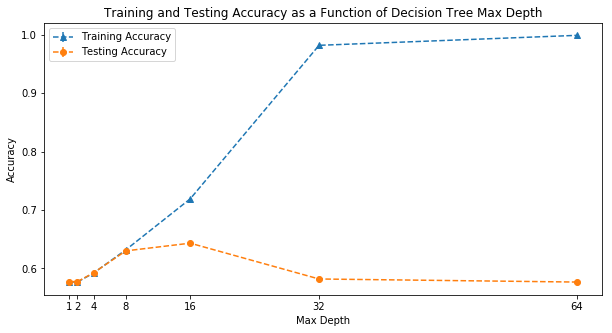

In [23]:
plt.figure(figsize=(10,5))

plt.errorbar(md, train_mean, yerr=train_std, linestyle='dashed', marker='^', label='Training Accuracy')
plt.errorbar(md, test_mean, yerr=test_std, linestyle='dashed', marker='o', label='Testing Accuracy')
plt.title('Training and Testing Accuracy as a Function of Decision Tree Max Depth')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.xticks(md, md)
plt.legend()

## Conclusion, removing outliers has little impact on this specific measure

## Try more detailed look at tree depth

In [36]:
md = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
rand_state = [1, 2, 3, 4, 5]

In [37]:
import numpy as np

train_accuracy = []
test_accuracy = []

for i in md:
    ta = []
    tsa = []
    for j in rand_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=j)
        clf = DecisionTreeClassifier(random_state=j, max_depth=i)
        clf = clf.fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        ta.append((accuracy_score(y_train, y_train_predict)))
        tsa.append((accuracy_score(y_test, y_test_predict)))
    train_accuracy.append(ta)
    test_accuracy.append(tsa)

In [38]:
train_mean = np.mean(train_accuracy,1)
train_std = np.std(train_accuracy, 1)
test_mean = np.mean(test_accuracy, 1)
test_std = np.std(test_accuracy, 1)

In [39]:
print(test_mean)
print(test_std)



[0.62993974 0.6352828  0.64059184 0.64355378 0.64584648 0.64677757
 0.6467973  0.6455894  0.64312191 0.63975529 0.63562354 0.63081642
 0.62555906]
[0.00084628 0.00061345 0.00033152 0.000211   0.00043588 0.00054847
 0.00044928 0.00032524 0.00050873 0.00037066 0.00038728 0.00066796
 0.00094652]


In [ ]:
plt.figure(figsize=(10,5))

plt.errorbar(md, train_mean, yerr=train_std, linestyle='dashed', marker='^', label='Training Accuracy')
plt.errorbar(md, test_mean, yerr=test_std, linestyle='dashed', marker='o', label='Testing Accuracy')
plt.title('Training and Testing Accuracy as a Function of Decision Tree Max Depth')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.xticks(md, md)
plt.legend()

## Try with random forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [26]:

ta = []
tsa = []
for j in rand_state:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=j)
    clf = RandomForestClassifier()
    clf = clf.fit(X_train, y_train)
    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)
    ta.append((accuracy_score(y_train, y_train_predict)))
    tsa.append((accuracy_score(y_test, y_test_predict)))


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.6/si

In [28]:
ta

[0.9792190433758712,
 0.9793848622447185,
 0.9794066364396177,
 0.9795071327237675,
 0.9795473312374275]

In [29]:
train_mean = np.mean(ta)
train_std = np.std(ta)
test_mean = np.mean(tsa)
test_std = np.std(tsa)

In [32]:
print(train_mean)
print(train_std)
print(test_mean)
print(test_std)

0.9794130012042805
0.00011433044322657766
0.6433143805430112
0.0007531544046529185


In [42]:
md = [5, 10, 50, 100]
rand_state = [1, 2, 3, 4, 5]
import numpy as np

train_accuracy = []
test_accuracy = []

for i in md:
    ta = []
    tsa = []
    for j in rand_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=j)
        clf = RandomForestClassifier(n_estimators=i, max_depth=14)
        clf = clf.fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        ta.append((accuracy_score(y_train, y_train_predict)))
        tsa.append((accuracy_score(y_test, y_test_predict)))
    train_accuracy.append(ta)
    test_accuracy.append(tsa)

In [46]:
train_accuracy

[[0.6910090999385298,
  0.6920391868510661,
  0.6928130082390204,
  0.691357487056916,
  0.6921731818965994],
 [0.6965481201332581,
  0.694169708075044,
  0.6961896833864568,
  0.6944092242189345,
  0.6966737404884454],
 [0.6985027728599735,
  0.6977858993663709,
  0.6996919788890805,
  0.7004825496577264,
  0.7001643114245851],
 [0.6999214454045561,
  0.6995764081623081,
  0.6996903039510114,
  0.7005863958180146,
  0.7003083560985333]]

In [47]:
train_mean = np.mean(train_accuracy, 1)
train_std = np.std(train_accuracy, 1)
test_mean = np.mean(test_accuracy, 1)
test_std = np.std(test_accuracy, 1)

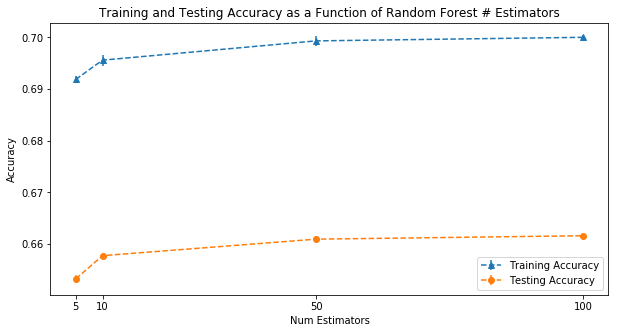

In [48]:
plt.figure(figsize=(10,5))

plt.errorbar(md, train_mean, yerr=train_std, linestyle='dashed', marker='^', label='Training Accuracy')
plt.errorbar(md, test_mean, yerr=test_std, linestyle='dashed', marker='o', label='Testing Accuracy')
plt.title('Training and Testing Accuracy as a Function of Random Forest # Estimators')
plt.ylabel('Accuracy')
plt.xlabel('Num Estimators')
plt.xticks(md, md)
plt.legend()

In [49]:
y_test_predict = clf.predict(X_test)


KeyboardInterrupt



In [50]:
print(y_test_predict)

[1 1 2 ... 2 2 2]


In [11]:
md = [50]
rand_state = [1, 2, 3, 4, 5]
import numpy as np

train_accuracy = []
test_accuracy = []

for i in md:
    ta = []
    tsa = []
    for j in rand_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=j)
        clf = RandomForestClassifier(n_estimators=i, max_depth=14)
        clf = clf.fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        ta.append((accuracy_score(y_train, y_train_predict)))
        tsa.append((accuracy_score(y_test, y_test_predict)))
    train_accuracy.append(ta)
    test_accuracy.append(tsa)
    test_accuracy.append(tsa)

In [12]:
train_mean = np.mean(train_accuracy, 1)
train_std = np.std(train_accuracy, 1)
test_mean = np.mean(test_accuracy, 1)
test_std = np.std(test_accuracy, 1)

In [13]:
print(train_mean)
print(train_std)
print(test_mean)
print(test_std)

[0.70912215]
[0.00035669]
[0.67265451 0.67265451]
[0.00080143 0.00080143]


In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)
clf = RandomForestClassifier(n_estimators=50, max_depth=14)
clf = clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)


[279964, 282467, 32080, 796, 706, 666, 965]


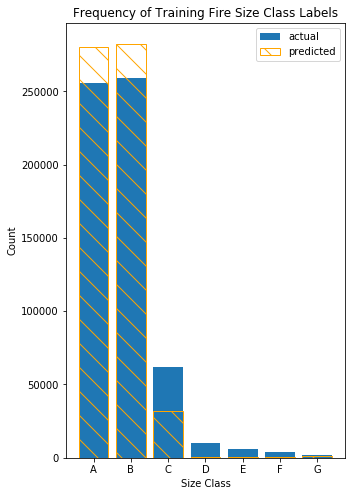

In [39]:
import collections
w = 0.3;
lab = ["A", "B", "C", "D", "E", "F", "G"]
c = collections.Counter(np.array(y_train))
c = sorted(c.items())
nnum = [i[0] for i in c]
freq = [i[1] for i in c]
f, ax = plt.subplots(figsize=(5,8))
plt.bar(nnum, freq, label="actual") 


c = collections.Counter(np.array(y_train_predict))
c = sorted(c.items())
nnum = [i[0] for i in c]
freq = [i[1] for i in c]
plt.bar(nnum, freq, label="predicted", edgecolor="orange", hatch='\\', fill=False) 

plt.title('Frequency of Training Fire Size Class Labels')
plt.ylabel('Count')
plt.xlabel('Size Class')
plt.xticks(range(1,8), lab)
plt.legend()
print(freq)


[137786, 140133, 15426, 244, 206, 213, 355]


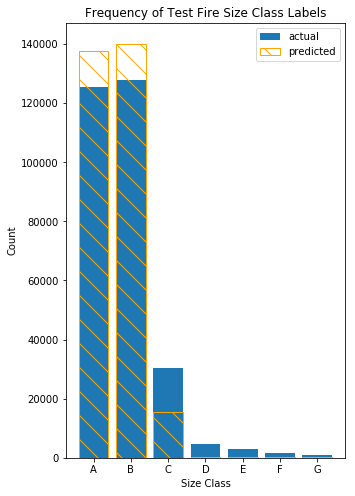

In [41]:
import collections
w = 0.3;
lab = ["A", "B", "C", "D", "E", "F", "G"]
c = collections.Counter(np.array(y_test))
c = sorted(c.items())
nnum = [i[0] for i in c]
freq = [i[1] for i in c]
f, ax = plt.subplots(figsize=(5,8))
plt.bar(nnum, freq, label="actual") 


c = collections.Counter(np.array(y_test_predict))
c = sorted(c.items())
nnum = [i[0] for i in c]
freq = [i[1] for i in c]
plt.bar(nnum, freq, label="predicted", edgecolor="orange", hatch='\\', fill=False) 

plt.title('Frequency of Test Fire Size Class Labels')
plt.ylabel('Count')
plt.xlabel('Size Class')
plt.xticks(range(1,8), lab)
plt.legend()
print(freq)


([<matplotlib.axis.XTick at 0x7f9ace0afc18>,
 <a list of 7 Text xticklabel objects>)

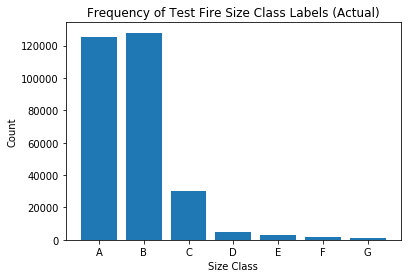

In [23]:
lab = ["A", "B", "C", "D", "E", "F", "G"]
c = collections.Counter(np.array(y_test))
c = sorted(c.items())
nnum = [i[0] for i in c]
freq = [i[1] for i in c]
f, ax = plt.subplots()
plt.bar(nnum, freq) 
plt.title('Frequency of Test Fire Size Class Labels (Actual)')
plt.ylabel('Count')
plt.xlabel('Size Class')
plt.xticks(range(1,8), lab)

([<matplotlib.axis.XTick at 0x7f9ace50ba90>,
 <a list of 7 Text xticklabel objects>)

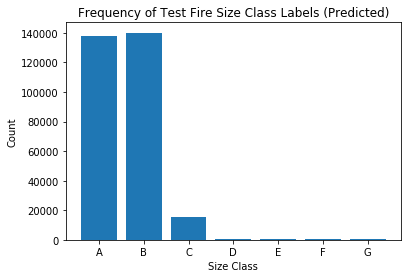

In [24]:
lab = ["A", "B", "C", "D", "E", "F", "G"]
c = collections.Counter(np.array(y_test_predict))
c = sorted(c.items())
nnum = [i[0] for i in c]
freq = [i[1] for i in c]
f, ax = plt.subplots()
plt.bar(nnum, freq) 
plt.title('Frequency of Test Fire Size Class Labels (Predicted)')
plt.ylabel('Count')
plt.xlabel('Size Class')
plt.xticks(range(1,8), lab)

In [44]:
y_test = np.array(y_test)

In [45]:
y_train = np.array(y_train)

In [61]:
y_test_predict[y_test == 1] == 1

array([ True,  True, False, ..., False,  True, False])

In [76]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [80]:
tp = [];
# Compute true positives for each category
for i in range(1,8):
    yt = y_test[y_test == i]
    ypr = y_test_predict[y_test == i]
    tp.append(accuracy_score(yt, ypr))



([<matplotlib.axis.XTick at 0x7f9ad4f17da0>,
 <a list of 7 Text xticklabel objects>)

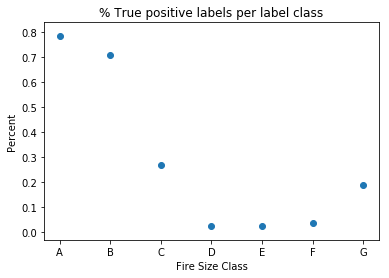

In [83]:
lab = ["A", "B", "C", "D", "E", "F", "G"]

f, ax = plt.subplots()
plt.scatter(range(1,8), tp)
plt.title('% True positive labels per label class')
plt.ylabel('Percent')
plt.xlabel('Fire Size Class')
plt.xticks(range(1,8), lab)

In [71]:
fpr

{1: array([nan, nan, nan]),
 2: array([nan, nan, nan]),
 3: array([nan, nan, nan]),
 4: array([nan, nan, nan]),
 5: array([nan, nan, nan]),
 6: array([nan, nan, nan]),
 7: array([nan, nan, nan])}